focus – optimize selection process
Business challenge/requirement
Motion Studios is the largest Radio production house in Europe. Their total revenue $ 1B+. Company has launched a new reality show – "The Star RJ". The show is about finding a new Radio Jockey who will be the star presenter on upcoming shows.
In first round participants have to upload their voice clip online and the clip will be evaluated by experts for selection into the next round. There is a separate team in the first round for evaluation of male and female voice.
Response to the show is unprecedented and company is flooded with voice clips.
You as a ML expert have to classify the voice as either male/female so that first level of filtration is quicker.
Key issues
Voice sample are across accents
Considerations
The output from the pre-processed WAV files were saved into the CSV file
Data volume
- Approx 3000 records – file voice-classification.csv
Fields in Data
• meanfreq: mean frequency (in kHz)
• sd: standard deviation of frequency
• median: median frequency (in kHz)
• Q25: first quantile (in kHz)
• Q75: third quantile (in kHz)
• IQR: interquantile range (in kHz)
• skew: skewness (see note in specprop description)
• kurt: kurtosis (see note in specprop description)
• sp.ent: spectral entropy
• sfm: spectral flatness
• mode: mode frequency
• centroid: frequency centroid (see specprop)
• peakf: peak frequency (frequency with highest energy)
• meanfun: average of fundamental frequency measured across acoustic signal
• minfun: minimum fundamental frequency measured across acoustic signal
• maxfun: maximum fundamental frequency measured across acoustic signal
• meandom: average of dominant frequency measured across acoustic signal
• mindom: minimum of dominant frequency measured across acoustic signal
• maxdom: maximum of dominant frequency measured across acoustic signal
• dfrange: range of dominant frequency measured across acoustic signal
• modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range
• label: male or female
Additional information
- NA
Business benefits
Since "The Star RJ" is a reality show, time to select candidates is very short. The whole success of the show and hence the profits depends upon quick and smooth execution

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
dfvoicedata = pd.read_csv('voice-classification.csv')

In [6]:
dfvoicedata.shape

(3168, 21)

In [7]:
dfvoicedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.8+ KB


In [17]:
dfdvoicedata.sample(5)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
1116,0.191693,0.060262,0.171698,0.139472,0.254113,0.114642,1.666841,5.407981,0.886658,0.320030,...,0.191693,0.120190,0.047198,0.265193,0.697115,0.023438,5.226562,5.203125,0.106231,male
2106,0.193391,0.035189,0.194444,0.181481,0.209136,0.027654,2.508827,8.826129,0.842892,0.254528,...,0.193391,0.182217,0.020151,0.262295,0.480469,0.164062,6.445312,6.281250,0.095970,female
133,0.211485,0.053871,0.232935,0.160666,0.253840,0.093174,2.284524,10.188958,0.903055,0.248022,...,0.211485,0.123414,0.023916,0.231884,0.646151,0.171875,5.203125,5.031250,0.119810,male
1496,0.139010,0.088429,0.133612,0.052029,0.224739,0.172710,1.253501,4.732239,0.968332,0.757766,...,0.139010,0.124160,0.018801,0.250000,0.498047,0.007812,4.593750,4.585938,0.097956,male
1151,0.192317,0.067481,0.205838,0.131171,0.253766,0.122595,2.202735,7.443891,0.890828,0.443123,...,0.192317,0.135909,0.050209,0.279070,1.090909,0.023438,7.289062,7.265625,0.104182,male


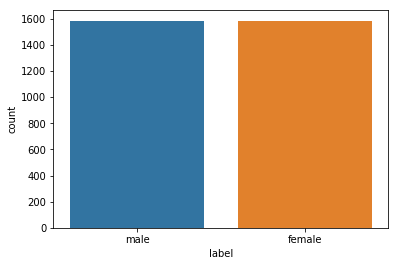

In [18]:
sns.countplot(dfdvoicedata['label'])

In [13]:
from sklearn.preprocessing import LabelEncoder

In [15]:
labelencoder = LabelEncoder()

In [19]:
dfdvoicedata['label'] = labelencoder.fit_transform(dfdvoicedata['label'].astype('str'))

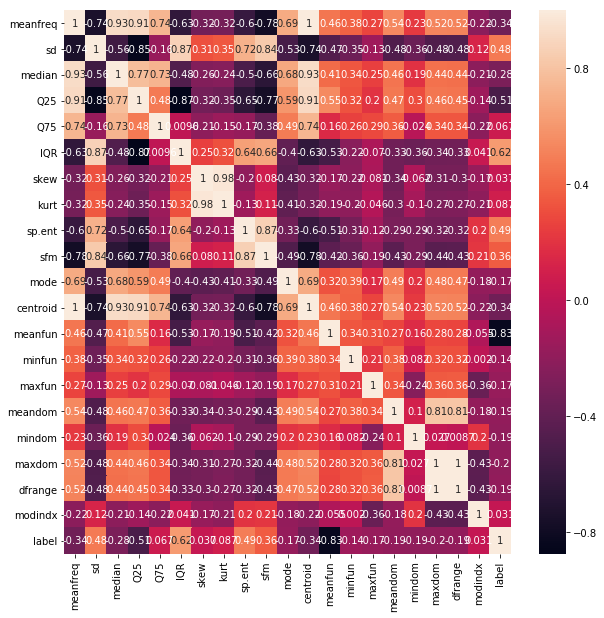

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(dfdvoicedata.corr(), annot=True)

In [21]:
X = dfdvoicedata.drop('label',axis=1)

In [22]:
y= dfdvoicedata.label

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
from sklearn.naive_bayes import GaussianNB

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=5)

In [27]:
X_train.shape

(2376, 20)

In [29]:
X_test.shape

(792, 20)

In [31]:
gaussioanNB = GaussianNB()

In [32]:
gaussioanNB.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [34]:
nbprediction = gaussioanNB.predict(X_test)

In [35]:
accuracy_score(y_test,nbprediction)

0.88510101010101

In [36]:
from sklearn.decomposition import PCA

In [41]:
pca = PCA(n_components=3)

In [42]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [43]:
pca.explained_variance_ratio_*100

array([9.98681426e+01, 1.26737277e-01, 4.33224331e-03])

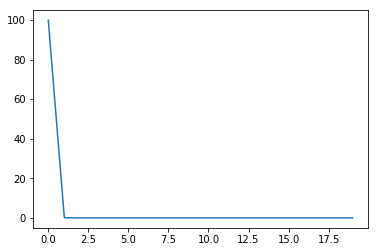

In [40]:
plt.plot(pca.explained_variance_ratio_*100)

In [44]:
transformedX = pd.DataFrame(pca.fit_transform(X))

In [45]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(transformedX,y,test_size=0.2)

In [46]:
gaussioanNB.fit(X_train1,y_train1)

GaussianNB(priors=None, var_smoothing=1e-09)

In [47]:
nbprediction1 = gaussioanNB.predict(X_test1)

In [48]:
accuracy_score(y_test1, nbprediction1)

0.6703470031545742